In [ ]:
## Setup
# install wandb
!pip install wandb
# install nequip
!git clone --depth 1 "https://github.com/mir-group/nequip.git"
!pip install nequip/
# fix colab imports
import site
site.main()
# set to allow anonymous WandB
import os
os.environ["WANDB_ANONYMOUS"] = "must"
#!pip install --force-reinstall numpy==1.24.4
import numpy as np
import torch
from ase.io import read, write
np.random.seed(0)
torch.manual_seed(0)
# compile lammps
!git clone -b stable_29Sep2021_update2 --depth 1 https://github.com/lammps/lammps.git
#!wget "https://github.com/mir-group/pair_nequip/archive/main.zip"
#!unzip -q main.zip
#!rm main.zip
#!mv pair_nequip-main pair_nequip
!cd pair_nequip && ./patch_lammps.sh ../lammps
!pip install mkl mkl-include
!cd lammps && mkdir -p build && cd build && cmake ../cmake -DPKG_KSPACE=ON -DCMAKE_PREFIX_PATH=`python -c 'import torch;print(torch.utils.cmake_prefix_path)'` && make -j4

In [ ]:
## NequIP setup
!cd ~
!git clone https://github.com/timduignan/LiCl-CG.git
!pip install MDAnalysis
import MDAnalysis as mda
from MDAnalysis.analysis import distances,rdf
from matplotlib import pyplot as plt
# run sim once
!cd LiCl-CG/licl-cg/training/ && nequip-train default.yaml

In [1]:
## More setup: defining all the in[TEMP].lammps files
# function takes a target temperature (as string), creates the in.lammps
def build_in_lammps(temperature):
    temp_dir = "LiCl-CG/licl-cg/" + str(temperature)
    in_temp = """units           metal
boundary        p p p
atom_style      charge
newton off
kspace_style pppm 0.000001
neighbor        2.0 bin
neigh_modify    every 10 delay 0 check no
read_data	../system.data-bigbox
dielectric 78.3
velocity        all create 300.0 23456789
pair_style hybrid/overlay nequip  coul/long  10.0
pair_coeff  * * coul/long
pair_coeff * *  nequip  ../training/results/default_LiCl/licl-deployted.pth  Li Cl
fix             1 all nvt temp """ + str(temperature) + " " + str(temperature) + """ .05
timestep        0.0005
thermo_style    custom step pe ke etotal temp press vol
thermo          100
dump		1 all custom 20 LiCl-out""" + str(temperature) + """.lammpstrj id element xu yu zu
dump_modify     1 element Li Cl
restart 	50000 restartfile1 restartfile2
run             100000"""
    with open(temp_dir + "/in" + str(temperature) + ".lammps", "w") as f:
        f.write(in_temp)
build_in_lammps(290)
build_in_lammps(300)
build_in_lammps(320)
build_in_lammps(350)
build_in_lammps(390)
build_in_lammps(440)
build_in_lammps(500)
build_in_lammps(570)
build_in_lammps(650)
build_in_lammps(740)
build_in_lammps(840)
build_in_lammps(950)
build_in_lammps(1070)
build_in_lammps(1200)
build_in_lammps(1340)
build_in_lammps(1490)
build_in_lammps(1650)
build_in_lammps(1820)
build_in_lammps(2000)
build_in_lammps(2190)
build_in_lammps(2390)
build_in_lammps(2600)
build_in_lammps(2820)
build_in_lammps(3050)
build_in_lammps(3290)
build_in_lammps(3540)
build_in_lammps(3800)

In [2]:
## Function for running the LAMMPS sim at a given temp, assumes all the files are there
!cd LiCl-CG/licl-cg/290 && ../../../lammps/build/lmp -in in290.lammps
!cd LiCl-CG/licl-cg/300 && ../../../lammps/build/lmp -in in300.lammps
!cd LiCl-CG/licl-cg/320 && ../../../lammps/build/lmp -in in320.lammps
!cd LiCl-CG/licl-cg/350 && ../../../lammps/build/lmp -in in350.lammps
!cd LiCl-CG/licl-cg/390 && ../../../lammps/build/lmp -in in390.lammps
!cd LiCl-CG/licl-cg/440 && ../../../lammps/build/lmp -in in440.lammps
!cd LiCl-CG/licl-cg/500 && ../../../lammps/build/lmp -in in500.lammps

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (25.260000 25.260000 25.260000)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  48 atoms
  read_data CPU = 0.003 seconds
NEQUIP is using device cpu
NequIP Coeff: type 1 is element Li
NequIP Coeff: type 2 is element Cl
Loading model from ../training/results/default_LiCl/licl-deployted.pth
Freezing TorchScript model...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.25534901
  grid = 12 12 12
  stencil order = 5
  estimated absolute RMS force accuracy = 1.263972e-05
  estimated relative force accuracy = 8.7777997e-07
  using double precision KISS FFT
  3d grid and FFT values/proc = 4913 1728
Neighbor list info ...
  update every 10 steps, delay 0 steps, check no
  max neighbors/atom: 20

In [3]:
!cd LiCl-CG/licl-cg/570 && ../../../lammps/build/lmp -in in570.lammps
!cd LiCl-CG/licl-cg/650 && ../../../lammps/build/lmp -in in650.lammps
!cd LiCl-CG/licl-cg/740 && ../../../lammps/build/lmp -in in740.lammps
!cd LiCl-CG/licl-cg/840 && ../../../lammps/build/lmp -in in840.lammps
!cd LiCl-CG/licl-cg/950 && ../../../lammps/build/lmp -in in950.lammps
!cd LiCl-CG/licl-cg/1070 && ../../../lammps/build/lmp -in in1070.lammps
!cd LiCl-CG/licl-cg/1200 && ../../../lammps/build/lmp -in in1200.lammps

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (25.260000 25.260000 25.260000)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  48 atoms
  read_data CPU = 0.002 seconds
NEQUIP is using device cpu
NequIP Coeff: type 1 is element Li
NequIP Coeff: type 2 is element Cl
Loading model from ../training/results/default_LiCl/licl-deployted.pth
Freezing TorchScript model...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.25534901
  grid = 12 12 12
  stencil order = 5
  estimated absolute RMS force accuracy = 1.263972e-05
  estimated relative force accuracy = 8.7777997e-07
  using double precision KISS FFT
  3d grid and FFT values/proc = 4913 1728
Neighbor list info ...
  update every 10 steps, delay 0 steps, check no
  max neighbors/atom: 20

In [4]:
!cd LiCl-CG/licl-cg/1340 && ../../../lammps/build/lmp -in in1340.lammps
!cd LiCl-CG/licl-cg/1490 && ../../../lammps/build/lmp -in in1490.lammps
!cd LiCl-CG/licl-cg/1650 && ../../../lammps/build/lmp -in in1650.lammps
!cd LiCl-CG/licl-cg/1820 && ../../../lammps/build/lmp -in in1820.lammps
!cd LiCl-CG/licl-cg/2000 && ../../../lammps/build/lmp -in in2000.lammps
!cd LiCl-CG/licl-cg/2190 && ../../../lammps/build/lmp -in in2190.lammps
!cd LiCl-CG/licl-cg/2390 && ../../../lammps/build/lmp -in in2390.lammps
!cd LiCl-CG/licl-cg/2600 && ../../../lammps/build/lmp -in in2600.lammps
!cd LiCl-CG/licl-cg/2820 && ../../../lammps/build/lmp -in in2820.lammps
!cd LiCl-CG/licl-cg/3050 && ../../../lammps/build/lmp -in in3050.lammps
!cd LiCl-CG/licl-cg/3290 && ../../../lammps/build/lmp -in in3290.lammps
!cd LiCl-CG/licl-cg/3540 && ../../../lammps/build/lmp -in in3540.lammps
!cd LiCl-CG/licl-cg/3800 && ../../../lammps/build/lmp -in in3800.lammps

LAMMPS (29 Sep 2021 - Update 2)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0.0000000 0.0000000 0.0000000) to (25.260000 25.260000 25.260000)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  48 atoms
  read_data CPU = 0.002 seconds
NEQUIP is using device cpu
NequIP Coeff: type 1 is element Li
NequIP Coeff: type 2 is element Cl
Loading model from ../training/results/default_LiCl/licl-deployted.pth
Freezing TorchScript model...
PPPM initialization ...
  using 12-bit tables for long-range coulomb (src/kspace.cpp:340)
  G vector (1/distance) = 0.25534901
  grid = 12 12 12
  stencil order = 5
  estimated absolute RMS force accuracy = 1.263972e-05
  estimated relative force accuracy = 8.7777997e-07
  using double precision KISS FFT
  3d grid and FFT values/proc = 4913 1728
Neighbor list info ...
  update every 10 steps, delay 0 steps, check no
  max neighbors/atom: 20

In [24]:
## Makes the Li-Li, Li-Cl, and Cl-Cl RDFs for every temp using MDAnalysis, does not plot them
# temp_list = [290, 300, 320, 350, 390, 440, 500, 570, 650, 740, 840, 950, 1070, 1200, 1340, 1490, 1650, 1820, 2000, 2190, 2390, 2600, 2820, 3050, 3290, 3540, 3800]
temp_list = [440, 500]
N = len(temp_list)
data_dump = []
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
#import MDAnalysis.analysis.rdf as rdf
for temp in temp_list:
    print("Up to temp: " + str(temp))
    # access data
    u=mda.Universe("LiCl-CG/licl-cg/LiCl-out-topol.lammpstrj","LiCl-CG/licl-cg/"+str(temp)+"/LiCl-out"+str(temp)+".lammpstrj",topology_format='LAMMPSDUMP',format='LAMMPSDUMP')
    # pull atoms
    Lis = u.select_atoms('type Li')
    Cls = u.select_atoms('type Cl')
    # make RDF
    rdfLiLi = rdf.InterRDF(Lis, Lis, nbins=1000)
    rdfLiCl = rdf.InterRDF(Lis, Cls, nbins=1000)
    rdfClCl = rdf.InterRDF(Cls, Cls, nbins=1000)
    rdfLiLi.run()
    rdfLiCl.run()
    rdfClCl.run()
    # store into list
    temp_list = []
    temp_list.append(temp)
    temp_list.append(rdfLiLi)
    temp_list.append(rdfLiCl)
    temp_list.append(rdfClCl)
    data_dump.append(temp_list)
# store all data in file
import pickle
file_dump = open("LiCl-CG/licl-cg/rdf_dump.data", 'wb')
pickle.dump(data_dump, file_dump)
file_dump.close()

Up to temp: 290


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Up to temp: 300
Up to temp: 320
Up to temp: 350
Up to temp: 390
Up to temp: 440
Up to temp: 500
Up to temp: 570
Up to temp: 650
Up to temp: 740
Up to temp: 840
Up to temp: 950
Up to temp: 1070
Up to temp: 1200
Up to temp: 1340
Up to temp: 1490
Up to temp: 1650
Up to temp: 1820
Up to temp: 2000
Up to temp: 2190
Up to temp: 2390
Up to temp: 2600
Up to temp: 2820
Up to temp: 3050
Up to temp: 3290
Up to temp: 3540
Up to temp: 3800


/tmp/ipykernel_22186/2526154673.py:32: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(data_dump, file_dump)


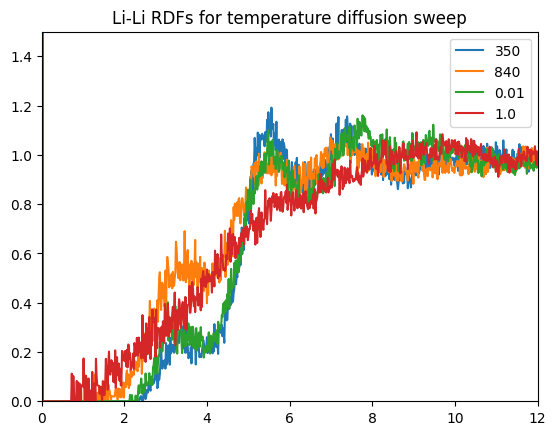

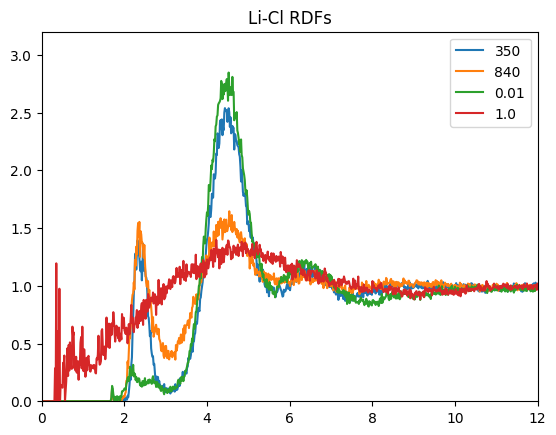

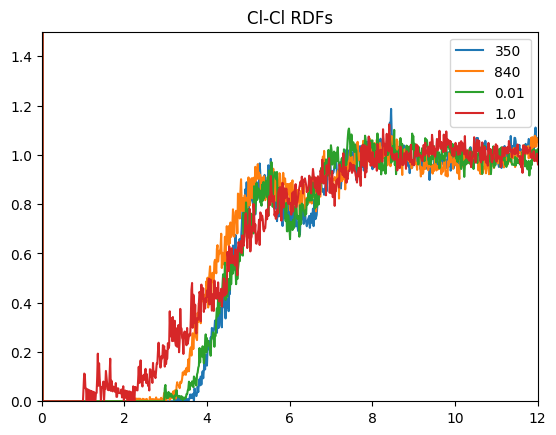

In [27]:
## plots the data on three plots, with a legend
temp_list = [290, 300, 320, 350, 390, 440, 500, 570, 650, 740, 840, 950, 1070, 1200, 1340, 1490, 1650, 1820, 2000, 2190, 2390, 2600, 2820, 3050, 3290, 3540, 3800]
disp_list = [350, 840]
diff_list = [0.01, 1.0]
long_list = disp_list.copy()
long_list.extend(diff_list)
import pickle
from matplotlib import pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf

def parse(in_stream, delim):
    out_arr = []
    in_arr = in_stream.split(delim)
    for str_num in in_arr:
        if len(str_num) == 0:
            continue
        out_arr.append(float(str_num))
    return out_arr

# temperature data
file_dump = open("LiCl-CG/licl-cg/rdf_dump.data", 'rb')
data_dump = pickle.load(file_dump)
# Li-Li plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[1].results
    plt.plot(res.bins, res.rdf)
# diffusion plot
for variance in diff_list:
    LiLi_bin = open('diffusion_comparison/Different-Variances/v='+str(variance)+'/Diff_RDFs/LiLiBins', 'r')
    LiLi_res = open('diffusion_comparison/Different-Variances/v='+str(variance)+'/Diff_RDFs/LiLiResults', 'r')
    LiLi_x = parse(LiLi_bin.read(), '\n')
    LiLi_y = parse(LiLi_res.read(), '\n')
    LiLi_bin.close()
    LiLi_res.close()
    plt.plot(LiLi_x, LiLi_y)
plt.xlim([0,12])
plt.ylim([0,1.5])
plt.title("Li-Li RDFs for temperature diffusion sweep")
plt.legend(long_list)
plt.savefig("LiCl-CG/licl-cg/full_temp2_Li-Li_RDF.pdf", bbox_inches='tight')
plt.show()
# Li-Cl plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[2].results
    plt.plot(res.bins, res.rdf)
# diffusion plot
for variance in diff_list:
    LiCl_bin = open('diffusion_comparison/Different-Variances/v='+str(variance)+'/Diff_RDFs/LiClBins', 'r')
    LiCl_res = open('diffusion_comparison/Different-Variances/v='+str(variance)+'/Diff_RDFs/LiClResults', 'r')
    LiCl_x = parse(LiCl_bin.read(), '\n')
    LiCl_y = parse(LiCl_res.read(), '\n')
    LiCl_bin.close()
    LiCl_res.close()
    plt.plot(LiCl_x, LiCl_y)
plt.xlim([0,12])
plt.ylim([0,3.2])
plt.title("Li-Cl RDFs")
plt.legend(long_list)
plt.savefig("LiCl-CG/licl-cg/full_temp2_Li-Cl_RDF.pdf", bbox_inches='tight')
plt.show()
# Cl-Cl plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[3].results
    plt.plot(res.bins, res.rdf)
# diffusion plot
for variance in diff_list:
    ClCl_bin = open('diffusion_comparison/Different-Variances/v='+str(variance)+'/Diff_RDFs/ClClBins', 'r')
    ClCl_res = open('diffusion_comparison/Different-Variances/v='+str(variance)+'/Diff_RDFs/ClClResults', 'r')
    ClCl_x = parse(ClCl_bin.read(), '\n')
    ClCl_y = parse(ClCl_res.read(), '\n')
    ClCl_bin.close()
    ClCl_res.close()
    plt.plot(ClCl_x, ClCl_y)
plt.xlim([0,12])
plt.ylim([0,1.5])
plt.title("Cl-Cl RDFs")
plt.legend(long_list)
plt.savefig("LiCl-CG/licl-cg/full_temp2_Cl-Cl_RDF.pdf", bbox_inches='tight')
plt.show()

file_dump.close()

In [ ]:
## plots the data on three plots, with a legend, and includes the diffusion at a given variance
temp_list = [290, 300, 320, 350, 390, 440, 500, 570, 650, 740, 840, 950, 1070, 1200, 1340, 1490, 1650, 1820, 2000, 2190, 2390, 2600, 2820, 3050, 3290, 3540, 3800]
disp_list = [290, 300, 320, 350, 390, 440, 500, 570]
import pickle
from matplotlib import pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
file_dump = open("LiCl-CG/licl-cg/rdf_dump.data", 'rb')
data_dump = pickle.load(file_dump)
# Li-Li plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[1].results
    plt.plot(res.bins, res.rdf)
plt.xlim([0,12])
plt.ylim([0,1.5])
plt.title("Li-Li RDFs over temp range 290K-570K")
plt.legend(disp_list)
plt.savefig("LiCl-CG/licl-cg/full_temp2_Li-Li_RDF.pdf", bbox_inches='tight')
plt.show()
# Li-Cl plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[2].results
    plt.plot(res.bins, res.rdf)
plt.xlim([0,12])
plt.ylim([0,3.2])
plt.title("Li-Cl RDFs")
plt.legend(disp_list)
plt.savefig("LiCl-CG/licl-cg/full_temp2_Li-Cl_RDF.pdf", bbox_inches='tight')
plt.show()
# Cl-Cl plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[3].results
    plt.plot(res.bins, res.rdf)
plt.xlim([0,12])
plt.ylim([0,1.5])
plt.title("Cl-Cl RDFs")
plt.legend(disp_list)
plt.savefig("LiCl-CG/licl-cg/full_temp2_Cl-Cl_RDF.pdf", bbox_inches='tight')
plt.show()

file_dump.close()

In [2]:
## Transform data from rdf to proper data.
import pickle
from MDAnalysis.analysis import rdf

file = open("LiCl-CG/licl-cg/rdf_dump.data", 'rb')
data = pickle.load(file)
file.close()
new_data = []

for temp_dump in data:
    temp_list = []
    temp_list.append(temp_dump[0])
    
    lili_list = ["LiLi"]
    lili_list.append(temp_dump[1].results.bins)
    lili_list.append(temp_dump[1].results.rdf)
    temp_list.append(lili_list)
    
    licl_list = ["LiCl"]
    licl_list.append(temp_dump[2].results.bins)
    licl_list.append(temp_dump[2].results.rdf)
    temp_list.append(licl_list)
    
    clcl_list = ["ClCl"]
    clcl_list.append(temp_dump[3].results.bins)
    clcl_list.append(temp_dump[3].results.rdf)
    temp_list.append(clcl_list)
    
    new_data.append(temp_list)

file2 = open("rdf_dump2.data", 'wb')
print(new_data)
pickle.dump(new_data, file2)
file2.close()

[[290, ['LiLi', array([7.50000e-03, 2.25000e-02, 3.75000e-02, 5.25000e-02, 6.75000e-02,
       8.25000e-02, 9.75000e-02, 1.12500e-01, 1.27500e-01, 1.42500e-01,
       1.57500e-01, 1.72500e-01, 1.87500e-01, 2.02500e-01, 2.17500e-01,
       2.32500e-01, 2.47500e-01, 2.62500e-01, 2.77500e-01, 2.92500e-01,
       3.07500e-01, 3.22500e-01, 3.37500e-01, 3.52500e-01, 3.67500e-01,
       3.82500e-01, 3.97500e-01, 4.12500e-01, 4.27500e-01, 4.42500e-01,
       4.57500e-01, 4.72500e-01, 4.87500e-01, 5.02500e-01, 5.17500e-01,
       5.32500e-01, 5.47500e-01, 5.62500e-01, 5.77500e-01, 5.92500e-01,
       6.07500e-01, 6.22500e-01, 6.37500e-01, 6.52500e-01, 6.67500e-01,
       6.82500e-01, 6.97500e-01, 7.12500e-01, 7.27500e-01, 7.42500e-01,
       7.57500e-01, 7.72500e-01, 7.87500e-01, 8.02500e-01, 8.17500e-01,
       8.32500e-01, 8.47500e-01, 8.62500e-01, 8.77500e-01, 8.92500e-01,
       9.07500e-01, 9.22500e-01, 9.37500e-01, 9.52500e-01, 9.67500e-01,
       9.82500e-01, 9.97500e-01, 1.01250e+00, 1.

In [7]:
## Makes the Li-Li, Li-Cl, and Cl-Cl RDFs for every temp using MDAnalysis, does not plot them
temp_list = [440, 500]
N = len(temp_list)
data_dump = []
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
#import MDAnalysis.analysis.rdf as rdf
for temp in temp_list:
    print("Up to temp: " + str(temp))
    # access data
    u=mda.Universe("gadi_to_local_tmep/full-out-topol.lammpstrj","gadi_to_local_tmep/LiCl-out-"+str(temp)+".lammpstrj",topology_format='LAMMPSDUMP',format='LAMMPSDUMP')
    # pull atoms
    Lis = u.select_atoms('type Li')
    Cls = u.select_atoms('type Cl')
    # make RDF
    rdfLiLi = rdf.InterRDF(Lis, Lis, nbins=1000)
    rdfLiCl = rdf.InterRDF(Lis, Cls, nbins=1000)
    rdfClCl = rdf.InterRDF(Cls, Cls, nbins=1000)
    rdfLiLi.run(start=5000)
    rdfLiCl.run(start=5000)
    rdfClCl.run(start=5000)
    # store into list
    temp_list = []
    temp_list.append(temp)
    temp_list.append(rdfLiLi)
    temp_list.append(rdfLiCl)
    temp_list.append(rdfClCl)
    data_dump.append(temp_list)
# store all data in file
import pickle
file_dump = open("LiCl-CG/licl-cg/rdf_dump_short_at_eq.data", 'wb')
pickle.dump(data_dump, file_dump)
file_dump.close()

Up to temp: 440


/home/adamr/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Up to temp: 500


/tmp/ipykernel_5190/505820733.py:32: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(data_dump, file_dump)


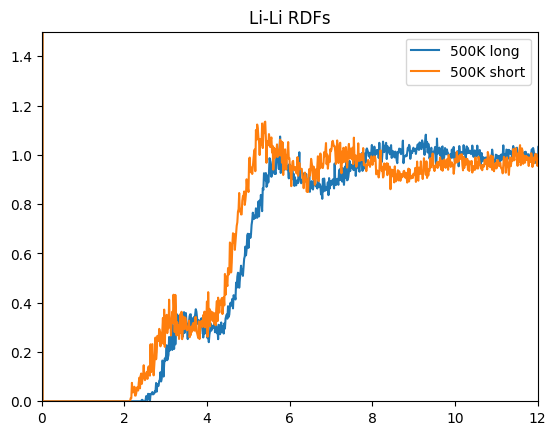

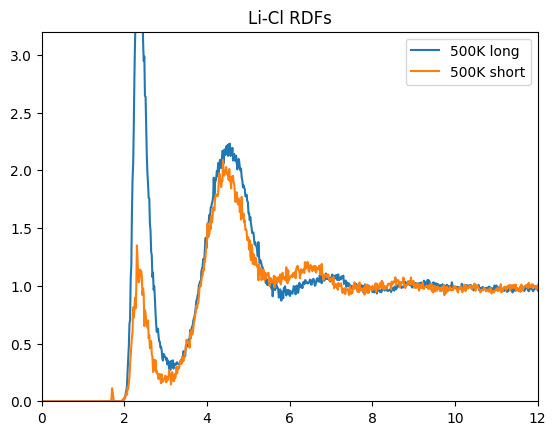

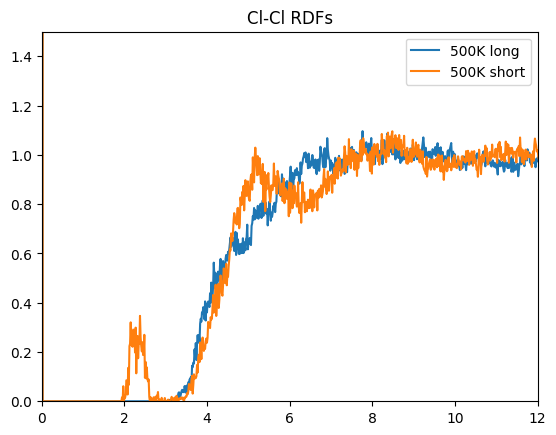

In [13]:
## plots the data on three plots, with a legend, and includes the diffusion at a given variance
temp_list = [290, 300, 320, 350, 390, 440, 500, 570, 650, 740, 840, 950, 1070, 1200, 1340, 1490, 1650, 1820, 2000, 2190, 2390, 2600, 2820, 3050, 3290, 3540, 3800]
disp_list = [500]
# disp_list2 = ["440K long", "500K long", "440K short", "500K short"]
disp_list2 = ["500K long", "500K short"]
import pickle
from matplotlib import pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
file_dump = open("LiCl-CG/licl-cg/rdf_dump_long.data", 'rb')
data_dump = pickle.load(file_dump)
old_file = open("LiCl-CG/licl-cg/rdf_dump.data", 'rb')
old_data = pickle.load(old_file)
# Li-Li plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[1].results
    plt.plot(res.bins, res.rdf)
for temp in old_data:
    if temp[0] not in disp_list:
        continue
    res = temp[1].results
    plt.plot(res.bins, res.rdf)
plt.xlim([0,12])
plt.ylim([0,1.5])
plt.title("Li-Li RDFs")
plt.legend(disp_list2)
plt.savefig("LiCl-CG/licl-cg/500K_comparison_Li-Li_RDF.pdf", bbox_inches='tight')
plt.show()
# Li-Cl plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[2].results
    plt.plot(res.bins, res.rdf)
for temp in old_data:
    if temp[0] not in disp_list:
        continue
    res = temp[2].results
    plt.plot(res.bins, res.rdf)
plt.xlim([0,12])
plt.ylim([0,3.2])
plt.title("Li-Cl RDFs")
plt.legend(disp_list2)
plt.savefig("LiCl-CG/licl-cg/500K_comparison_Li-Cl_RDF.pdf", bbox_inches='tight')
plt.show()
# Cl-Cl plot
for temp in data_dump:
    if temp[0] not in disp_list:
        continue
    res = temp[3].results
    plt.plot(res.bins, res.rdf)
for temp in old_data:
    if temp[0] not in disp_list:
        continue
    res = temp[3].results
    plt.plot(res.bins, res.rdf)
plt.xlim([0,12])
plt.ylim([0,1.5])
plt.title("Cl-Cl RDFs")
plt.legend(disp_list2)
plt.savefig("LiCl-CG/licl-cg/500K_comparison_Cl-Cl_RDF.pdf", bbox_inches='tight')
plt.show()

file_dump.close()